In [1]:
import pandas as pd
df = pd.read_csv('chk.csv')
df.columns = ['id', 'score']
df.head()

,id,score
0,6_2_500,-11.600000
1,1_4_33,-8.666667
2,3_6_9309,-6.866667
3,0_2_1363,-13.666667
4,0_4_8855,-9.933333


In [2]:
subset = df[df.id.str.contains('0_3_')]
subset.head()

,id,score
15,0_3_626,-11.833333
16,0_3_3158,-10.566667
68,0_3_4958,-11.200000
111,0_3_1759,-11.900000
152,0_3_9525,-11.733333


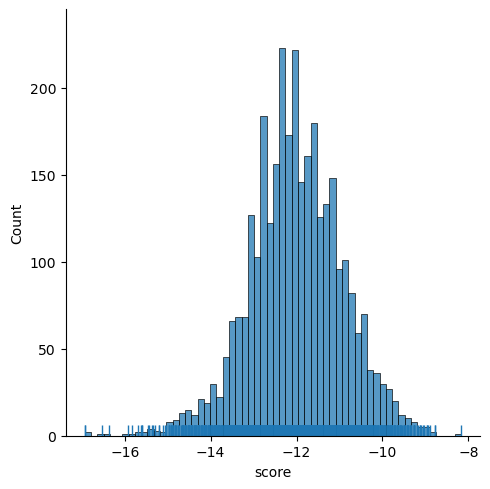

In [3]:
import numpy as np
import seaborn as sns

sns.displot(subset.score, bins=60, kde=False, rug=True)

In [5]:
subset[subset.score > -10]

,id,score
1089,0_3_8254,-9.966667
2433,0_3_2411,-9.800000
4923,0_3_9136,-9.800000
5470,0_3_2797,-9.800000
6661,0_3_63,-9.766667
...,...,...
86015,0_3_559,-9.033333
86824,0_3_2771,-9.833333
87283,0_3_397,-8.766667
87360,0_3_4894,-9.600000


In [7]:
df['lig'] = df.id.str.split('_').str[2].astype(int)
df.head()

,id,score,lig
0,6_2_500,-11.600000,500
1,1_4_33,-8.666667,33
2,3_6_9309,-6.866667,9309
3,0_2_1363,-13.666667,1363
4,0_4_8855,-9.933333,8855


In [8]:

df['subset'] = df.lig.apply(lambda lig: 'chembl' if lig < 415 else 'zinc')

<Axes: xlabel='score', ylabel='Probability'>

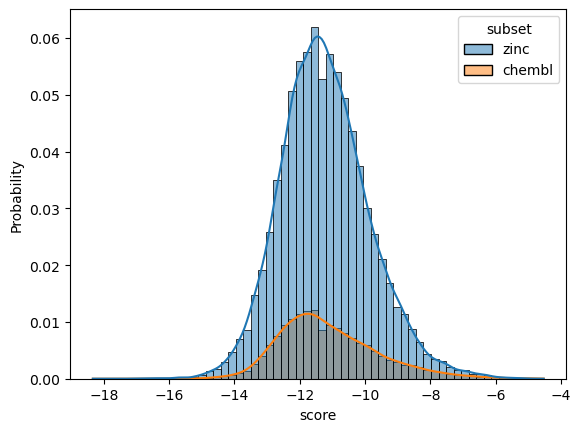

In [17]:
sns.histplot(data=df, x='score', hue='subset', bins=60, kde=True, stat='probability')

In [46]:
top_10_chembl = df[df.subset == 'chembl'].sort_values(by='score', ascending=True).head(10)
top_10_chembl

,id,score,lig,subset
69045,0_4_161,-16.466667,161,chembl
52892,0_3_108,-15.833333,108,chembl
38588,0_3_40,-15.700000,40,chembl
53951,0_2_9,-15.533333,9,chembl
63299,0_3_295,-15.466667,295,chembl
65516,0_3_213,-15.300000,213,chembl
52332,1_4_161,-15.233333,161,chembl
54868,0_3_119,-15.200000,119,chembl
50697,4_2_335,-15.133333,335,chembl
53211,5_3_161,-15.133333,161,chembl


In [47]:
top_10_zinc = df[df.subset == 'zinc'].sort_values(by='score', ascending=True).head(10)
top_10_zinc

,id,score,lig,subset
18223,6_3_1977,-18.333333,1977,zinc
450,0_0_1661,-17.200000,1661,zinc
36870,1_4_8972,-17.100000,8972,zinc
31430,5_3_1977,-16.966667,1977,zinc
13934,0_3_3661,-16.933333,3661,zinc
26891,0_3_2866,-16.933333,2866,zinc
62652,1_3_8356,-16.933333,8356,zinc
24637,0_2_2388,-16.866667,2388,zinc
38905,1_3_3438,-16.833333,3438,zinc
56746,5_3_6279,-16.733333,6279,zinc


In [60]:
import os
for id in top_10_chembl.id:
    print(id)
    os.system(f'cp ./docked_mols/{id}.pdbqt ./best_chembl')
    os.system(f'mk_export.py ./best_chembl/{id}.pdbqt')
    os.system(f'rm ./best_chembl/{id}.pdbqt')

0_4_161
0_3_108
0_3_40
0_2_9
0_3_295
0_3_213
1_4_161
0_3_119
4_2_335
5_3_161


In [53]:
for id in top_10_zinc.id:
    print(id)
    os.system(f'cp ./docked_mols/{id}.pdbqt ./best_zinc')
    os.system(f'mk_export.py ./best_zinc/{id}.pdbqt')
    os.system(f'rm ./best_zinc/{id}.pdbqt')

6_3_1977
0_0_1661
1_4_8972
5_3_1977
0_3_3661
0_3_2866
1_3_8356
0_2_2388
1_3_3438
5_3_6279


In [40]:
import py3Dmol as p3d

def view_sdf(sdf):
    view = p3d.view(width=400, height=400)
    with open(sdf) as f:
        view.addModel(f.read(), 'sdf')
    view.setStyle({'stick': {'radius': 0.1}})
    view.zoomTo()
    return view.show()

In [63]:
from ipywidgets import interact
import os

@interact
def show_folder(folder=os.listdir('./best_chembl'), bad_ring=False):
    folder = './best_chembl/' + folder
    if bad_ring:
        os.remove(folder)
    return view_sdf(folder)

interactive(children=(Dropdown(description='folder', options=('0_3_108_docked.sdf', '0_3_40_docked.sdf', '0_3_…

In [67]:
@interact
def show_folder(folder=os.listdir('./best_zinc'), bad_ring=False):
    folder = './best_zinc/' + folder
    if bad_ring:
        os.remove(folder)
        bad_ring = False
    return view_sdf(folder)

interactive(children=(Dropdown(description='folder', options=('5_3_1977_docked.sdf', '0_2_2388_docked.sdf', '6…

In [71]:
with open('../data/parts/ligands_v4.smi') as f:
    ligands = f.readlines()

In [76]:
ligands[0][:-1]

'O=C(O)CCCC[C@@H]1CCSS1'

In [77]:
top_10_chembl['ligand_smiles'] = top_10_chembl.lig.apply(lambda lig: ligands[lig][:-1])
top_10_zinc['ligand_smiles'] = top_10_zinc.lig.apply(lambda lig: ligands[lig][:-1])

In [86]:
top_10_zinc

,id,score,lig,subset,ligand_smiles
18223,6_3_1977,-18.333333,1977,zinc,O=C(O)[C@@H]1CCCC[C@@H]1NS(=O)(=O)c1ccc2ccccc2c1
450,0_0_1661,-17.200000,1661,zinc,CC1=C(C)C[C@@H](C(=O)O)[C@@H](C(=O)N2CCN(c3ccc...
36870,1_4_8972,-17.100000,8972,zinc,O=C(O)c1ccccc1C(=O)Nc1ccc(N2C(=O)[C@H]3[C@@H]4...
31430,5_3_1977,-16.966667,1977,zinc,O=C(O)[C@@H]1CCCC[C@@H]1NS(=O)(=O)c1ccc2ccccc2c1
13934,0_3_3661,-16.933333,3661,zinc,Cc1ccc(NC(=O)C[C@@H](C(=O)O)N2CCOCC2)cc1
26891,0_3_2866,-16.933333,2866,zinc,Cc1ccccc1NC(=S)NN1C(=O)CS[C@H]1c1ccccc1C(=O)O
62652,1_3_8356,-16.933333,8356,zinc,O=C(NC1(C(=O)O)CCCCC1)c1nc(C2CC2)n[nH]1
24637,0_2_2388,-16.866667,2388,zinc,COc1cc([C@@H]2N[C@H](C(=O)O)CS2)ccc1OCc1ccc(Cl...
38905,1_3_3438,-16.833333,3438,zinc,Cc1ccc([C@@H]2[C@H](C(=O)O)c3ccccc3C(=O)N2c2cc...
56746,5_3_6279,-16.733333,6279,zinc,O=C(O)[C@H]1CC2(CCN(C(=O)C3CC3)CC2)CN1C(=O)CCn...


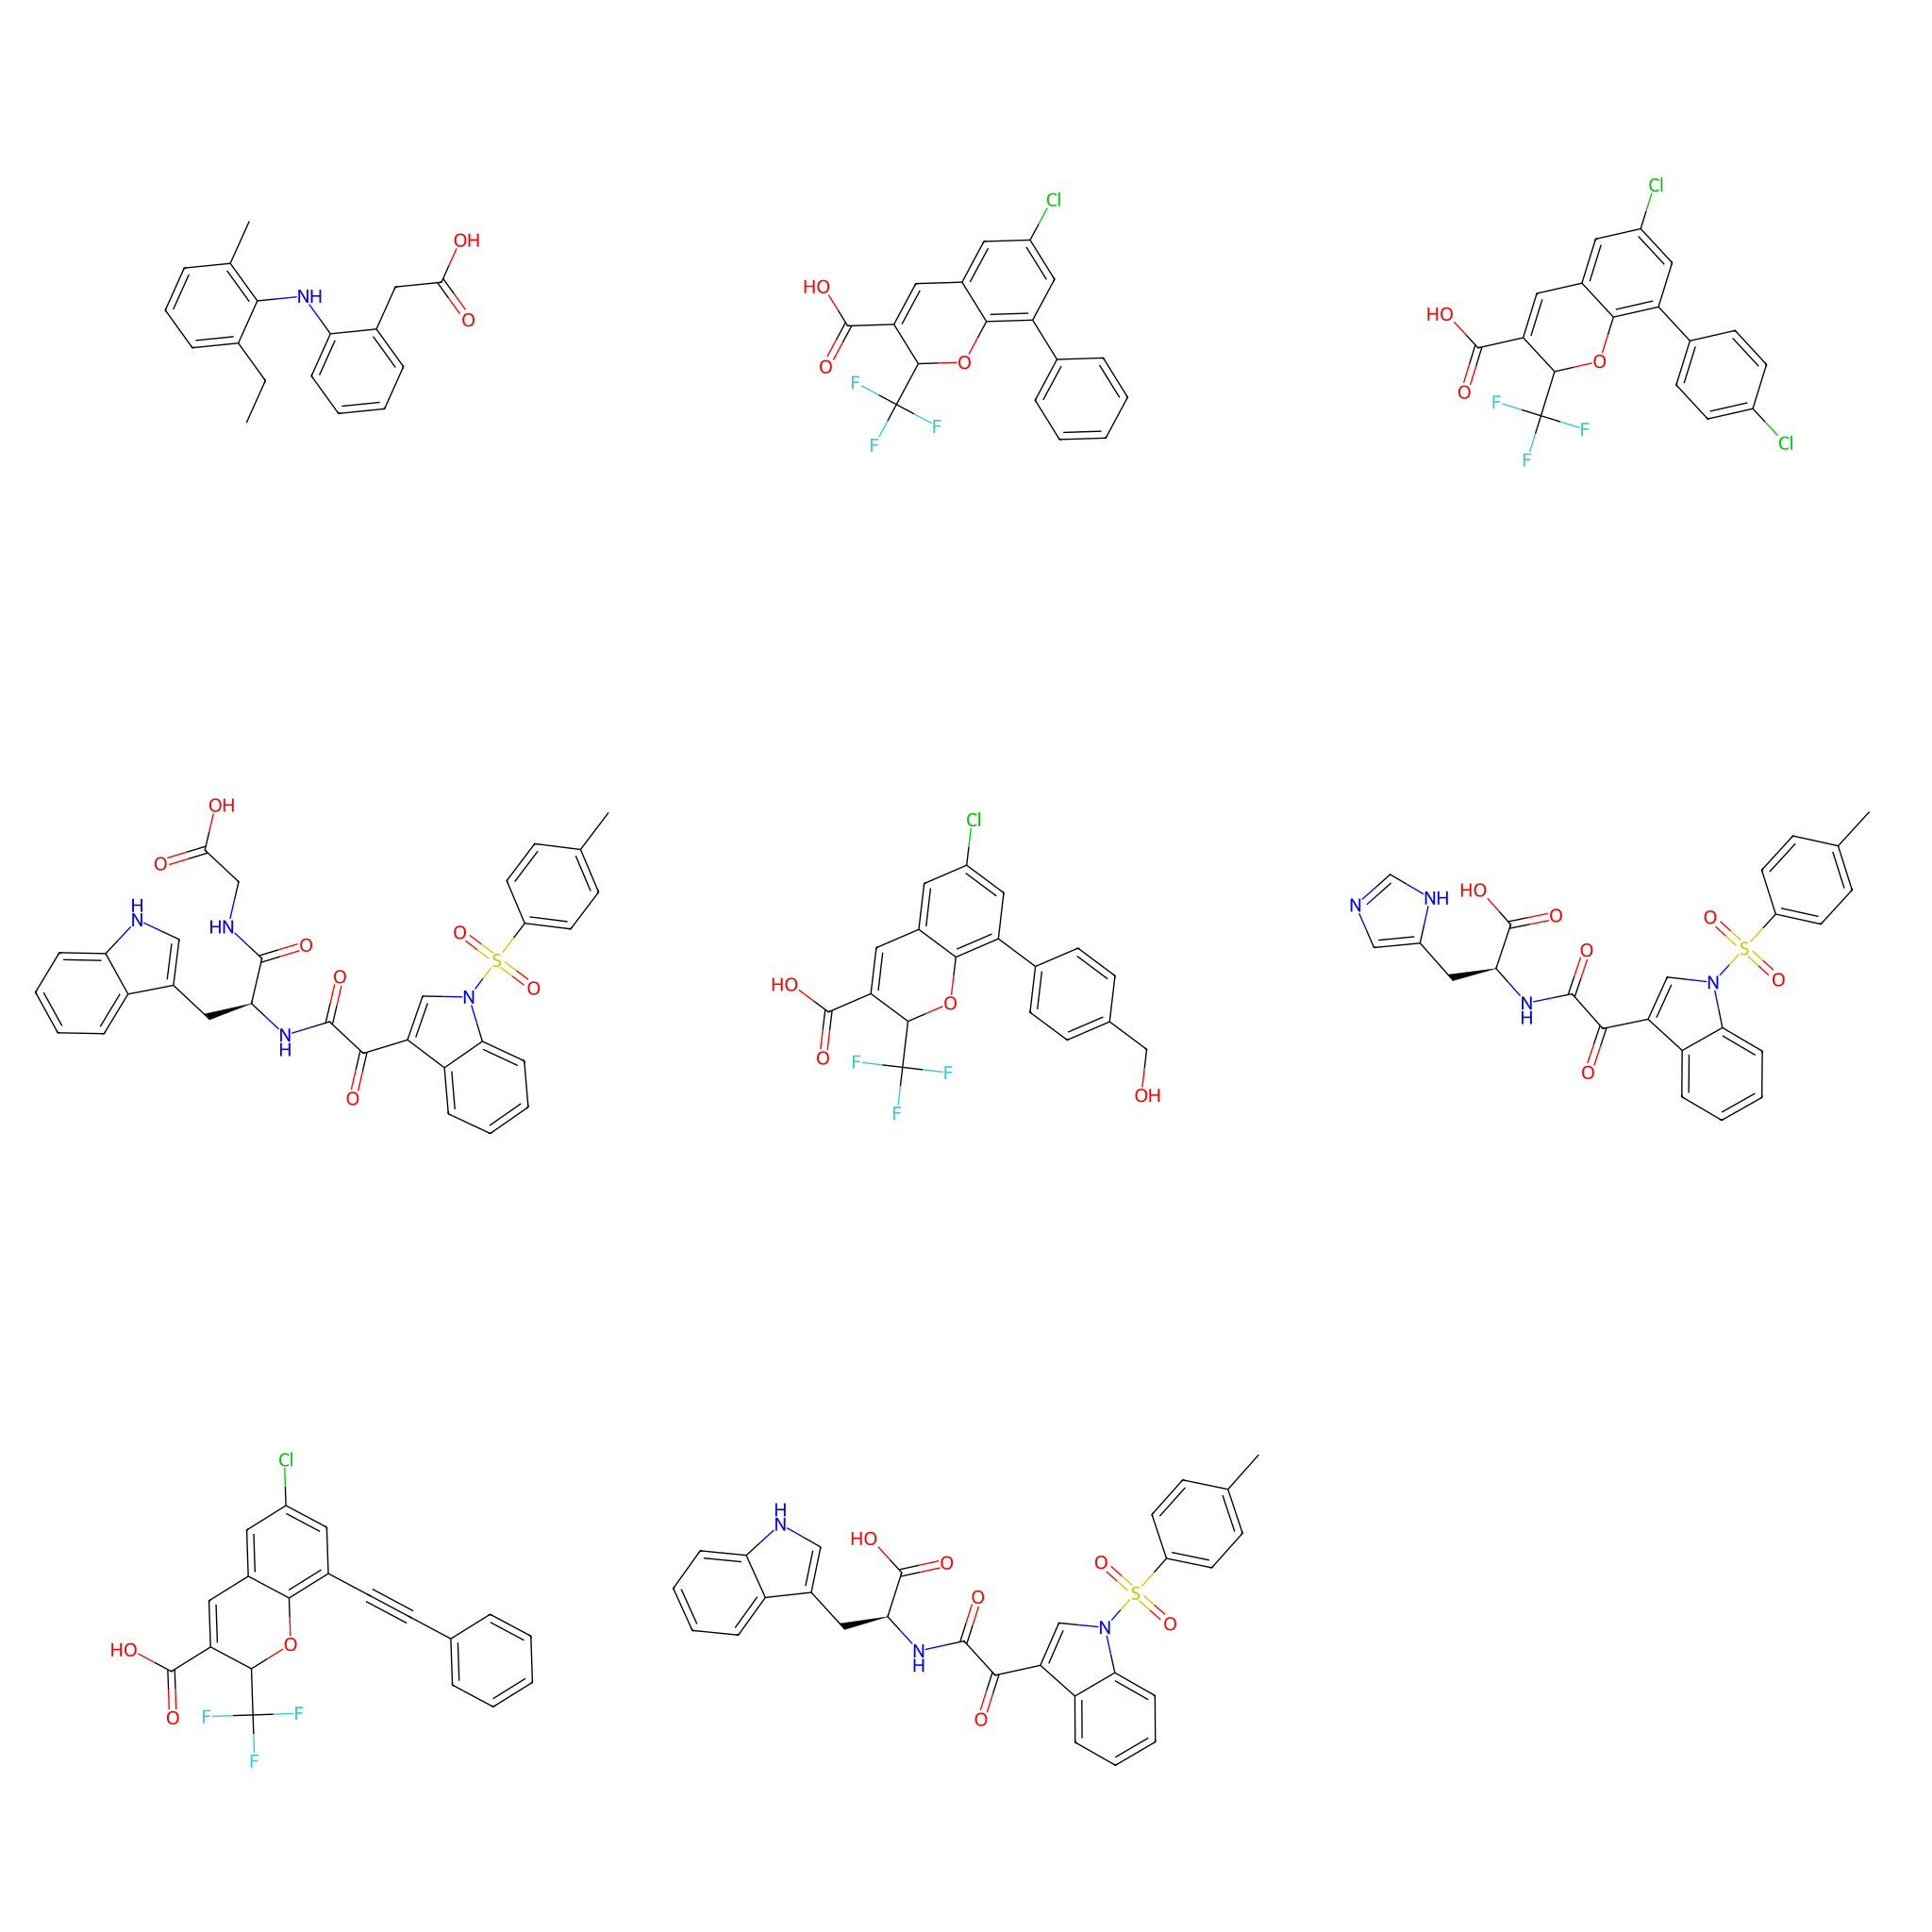

In [97]:
from rdkit import Chem
from rdkit.Chem import Draw
unique_ligs = top_10_chembl.ligand_smiles.unique()
unique_ligs = [Chem.MolFromSmiles(lig) for lig in unique_ligs]

Draw.MolsToGridImage(unique_ligs, molsPerRow=3, subImgSize=(1000, 1000), useSVG=True)

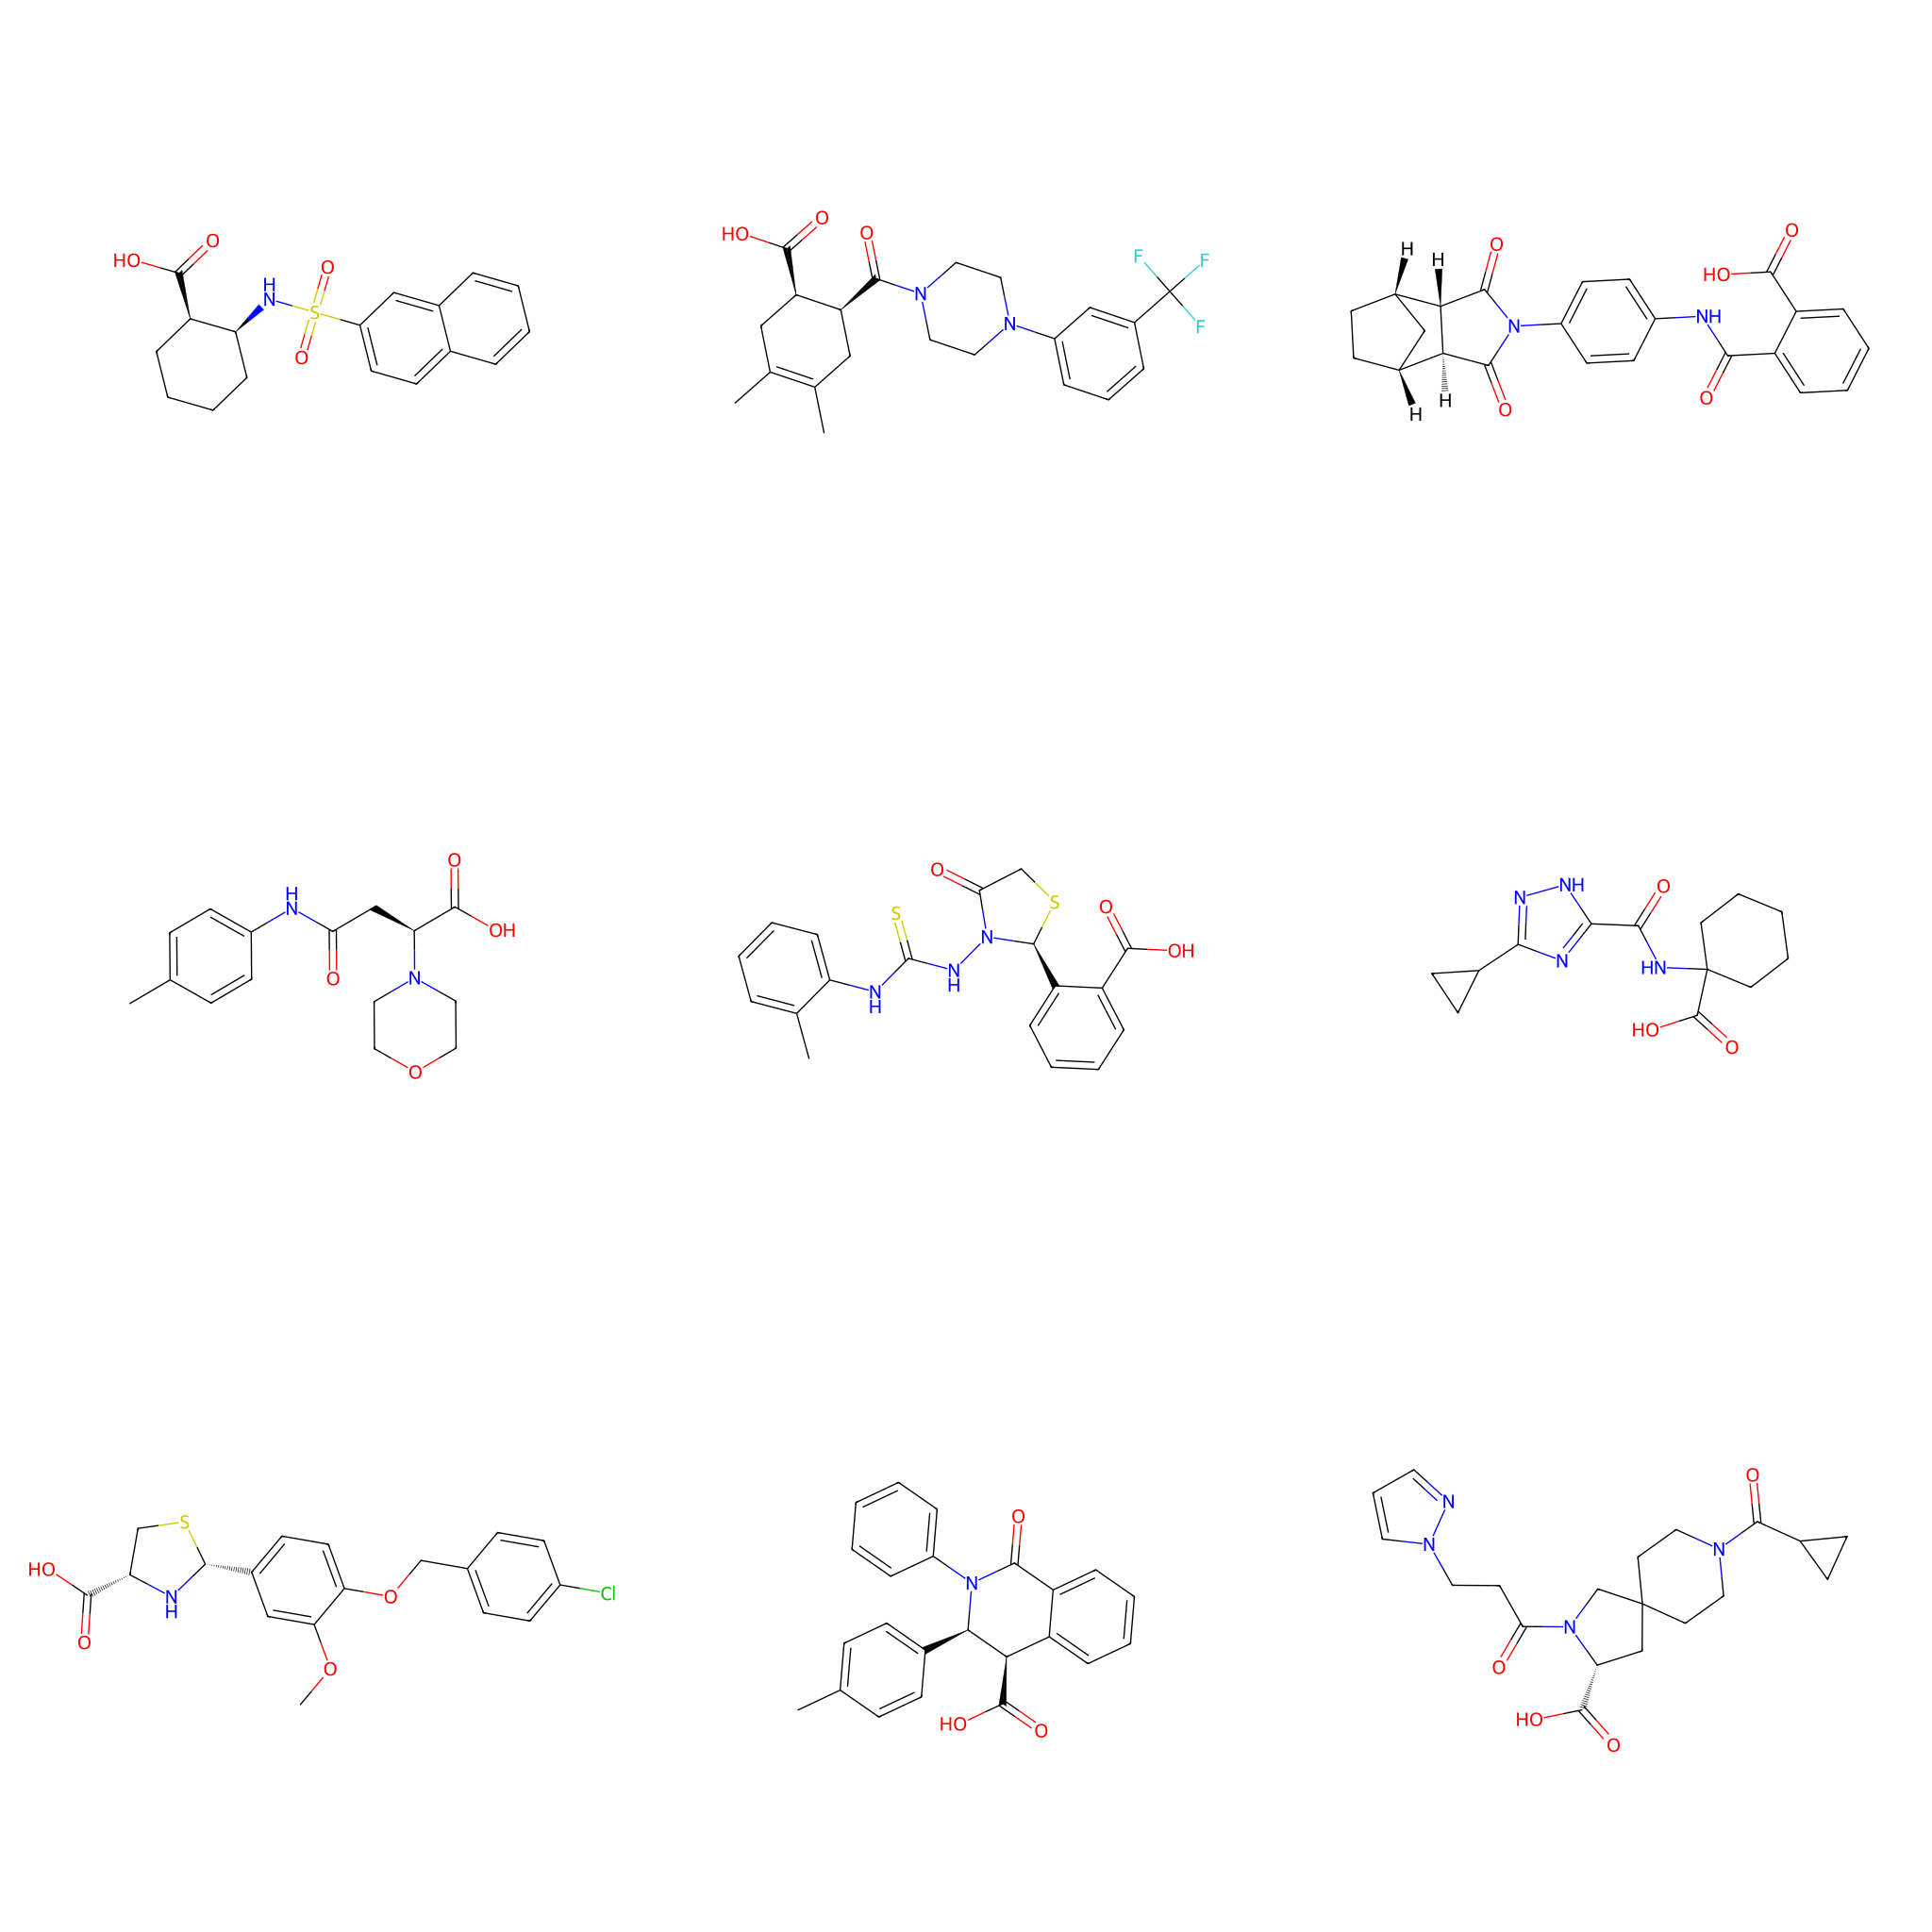

In [98]:
zinc_names = ['Ligand ' + str(i) for i in top_10_zinc.lig.to_list()]
unique_ligs = top_10_zinc.ligand_smiles.unique()
unique_ligs = [Chem.MolFromSmiles(lig) for lig in unique_ligs]
Draw.MolsToGridImage(unique_ligs, molsPerRow=3, subImgSize=(1000, 1000), useSVG=True)

In [114]:
ligands[2388]

'COc1cc([C@@H]2N[C@H](C(=O)O)CS2)ccc1OCc1ccc(Cl)cc1\n'

In [112]:
top_10_zinc

,id,score,lig,subset,ligand_smiles
18223,6_3_1977,-18.333333,1977,zinc,O=C(O)[C@@H]1CCCC[C@@H]1NS(=O)(=O)c1ccc2ccccc2c1
450,0_0_1661,-17.200000,1661,zinc,CC1=C(C)C[C@@H](C(=O)O)[C@@H](C(=O)N2CCN(c3ccc...
36870,1_4_8972,-17.100000,8972,zinc,O=C(O)c1ccccc1C(=O)Nc1ccc(N2C(=O)[C@H]3[C@@H]4...
31430,5_3_1977,-16.966667,1977,zinc,O=C(O)[C@@H]1CCCC[C@@H]1NS(=O)(=O)c1ccc2ccccc2c1
13934,0_3_3661,-16.933333,3661,zinc,Cc1ccc(NC(=O)C[C@@H](C(=O)O)N2CCOCC2)cc1
26891,0_3_2866,-16.933333,2866,zinc,Cc1ccccc1NC(=S)NN1C(=O)CS[C@H]1c1ccccc1C(=O)O
62652,1_3_8356,-16.933333,8356,zinc,O=C(NC1(C(=O)O)CCCCC1)c1nc(C2CC2)n[nH]1
24637,0_2_2388,-16.866667,2388,zinc,COc1cc([C@@H]2N[C@H](C(=O)O)CS2)ccc1OCc1ccc(Cl...
38905,1_3_3438,-16.833333,3438,zinc,Cc1ccc([C@@H]2[C@H](C(=O)O)c3ccccc3C(=O)N2c2cc...
56746,5_3_6279,-16.733333,6279,zinc,O=C(O)[C@H]1CC2(CCN(C(=O)C3CC3)CC2)CN1C(=O)CCn...


In [111]:
# get top 2.5% of the dataset
top_2_5 = df.sort_values(by='score', ascending=True).head(int(len(df) * 0.025))
top_2_5.subset.value_counts()

zinc      1938
chembl     265
Name: subset, dtype: int64